## Importing and Reading Data

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [8]:
admission_df = pd.read_csv('Admission_Predict.csv')
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission_df = admission_df.drop(columns="Serial No.")

In [9]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Checking Dataset for any null values

In [10]:
admission_df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
admission_df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
admission_df.duplicated().sum()

0

In [9]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [10]:
admission_df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

### Distribution Score

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

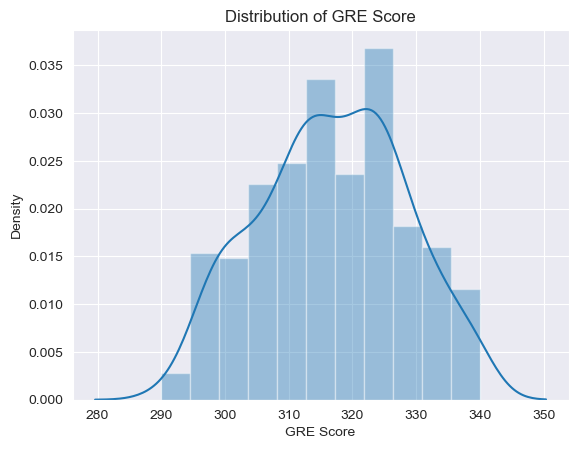

In [24]:
plt1 = sns.distplot(admission_df['GRE Score'])
plt.title('Distribution of GRE Score')
plt.show()

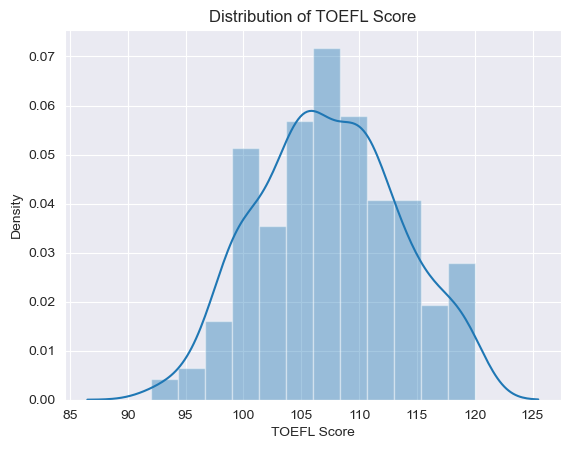

In [23]:
plt1 = sns.distplot(admission_df['TOEFL Score'])
plt.title('Distribution of TOEFL Score')
plt.show()

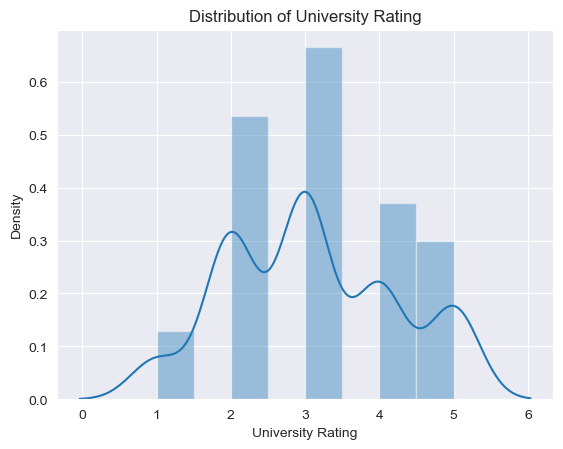

In [19]:
plt1 = sns.distplot(admission_df['University Rating'])
plt.title("Distribution of University Rating")
plt.show()

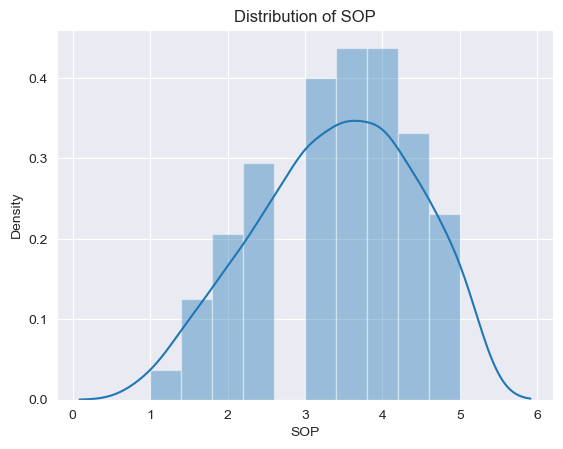

In [20]:
plt1 = sns.distplot(admission_df['SOP'])
plt.title("Distribution of SOP")
plt.show()

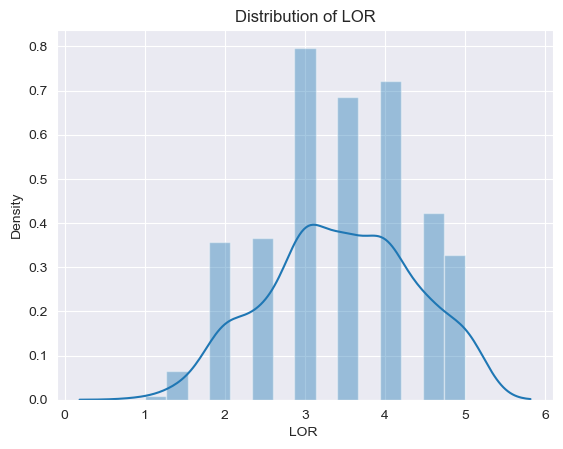

In [21]:
plt1 = sns.distplot(admission_df['LOR '])
plt.title("Distribution of LOR")
plt.show()

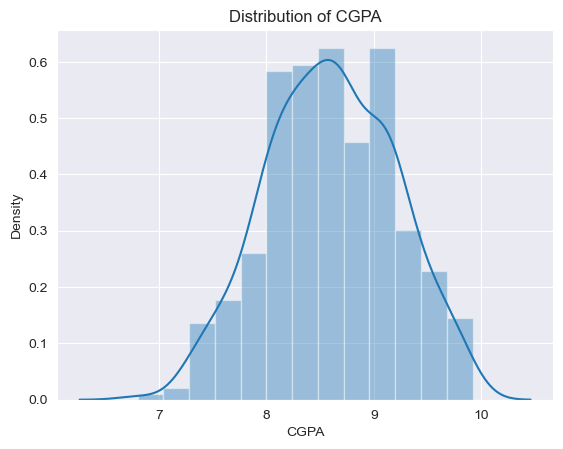

In [22]:
plt1 = sns.distplot(admission_df['CGPA'])
plt.title("Distribution of CGPA")
plt.show()

With the help of these distribution plots, we can easily see the scores of GRE, TOEFL, and so on that are most commonly scored by the students. The most common scores in:

1. GRE --> between 320 to 330 and then 310 to 320
2. TOEFL --> between 105 and 110. Mostly above 100.
3. University Rating --> 3
4. SOP --> between 3 and 4, mostly near 4
5. LOR --> 3 and 4
6. CGPA --> above 8.5 and also, 9 is mostly scored cgpa.

### Relation between different factors in the dataset

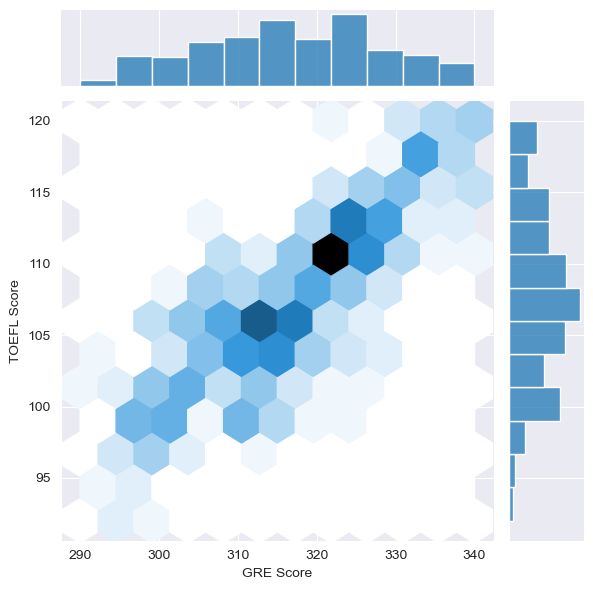

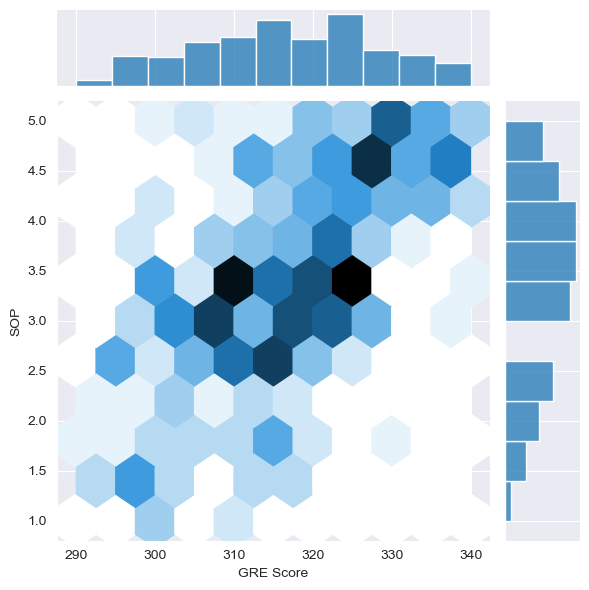

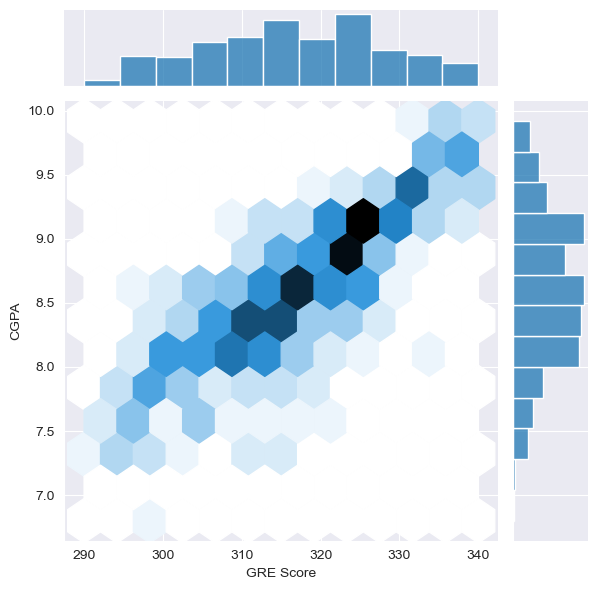

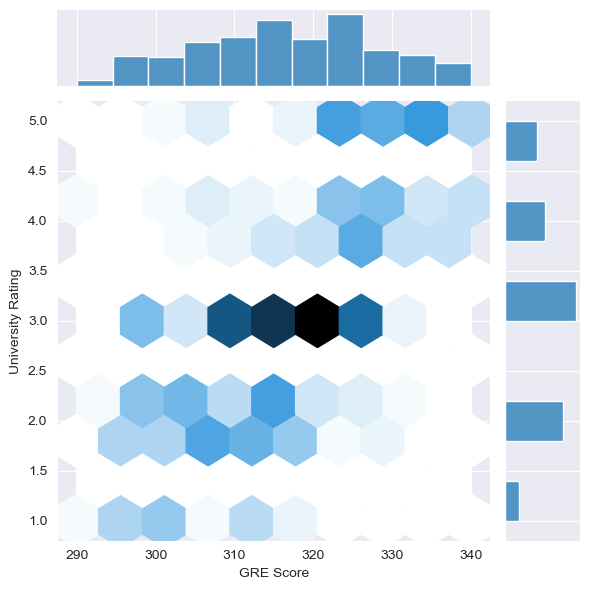

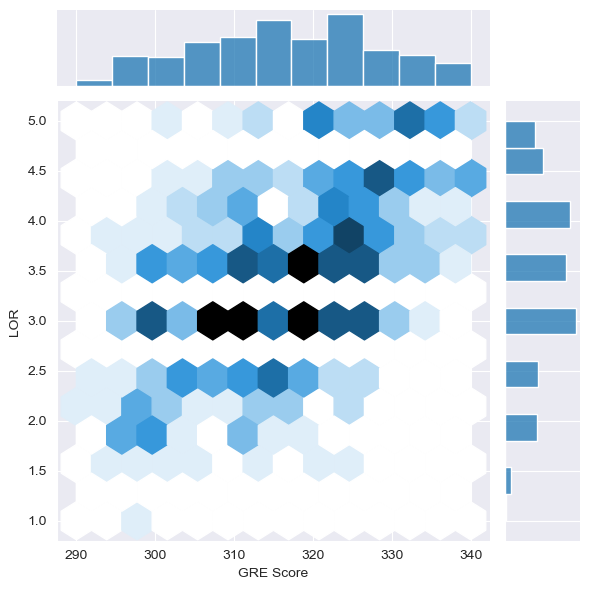

In [26]:
plt2 = sns.jointplot(x = admission_df['GRE Score'], y = admission_df['TOEFL Score'], kind = 'hex')
plt3 = sns.jointplot(x = admission_df['GRE Score'], y = admission_df['SOP'], kind = 'hex')
plt4 = sns.jointplot(x = admission_df['GRE Score'], y = admission_df['CGPA'], kind = 'hex')
plt5 = sns.jointplot(x = admission_df['GRE Score'], y = admission_df['University Rating'], kind = 'hex')
plt5 = sns.jointplot(x = admission_df['GRE Score'], y = admission_df['LOR '], kind = 'hex')

Insights:
1. GRE score and TOEFL score are directly related. People with higher GRE scores tends to get high scores in TOEFL.
2. People with higher CGPA tends to get higher GRE score.
3. Various LOR scores are distributed among various GRE scores. So, GRE and LOR scores are not much related.
4. The relation between GRE score and SOP & GRE Score and University Rating are similar to the case of LOR and GRE. They are slightly related.

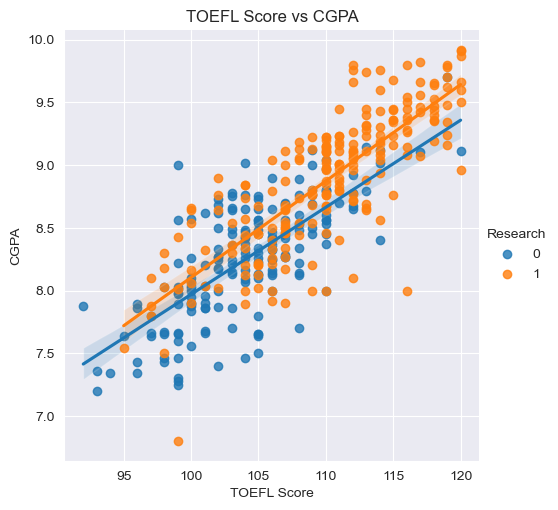

In [27]:
fig = sns.lmplot(x="TOEFL Score", y="CGPA", data=admission_df, hue="Research")
plt.title("TOEFL Score vs CGPA")
plt.show()

TOEFL Score and CGPA are highly related. People with high CGPA tend to get high TOEFL scores.

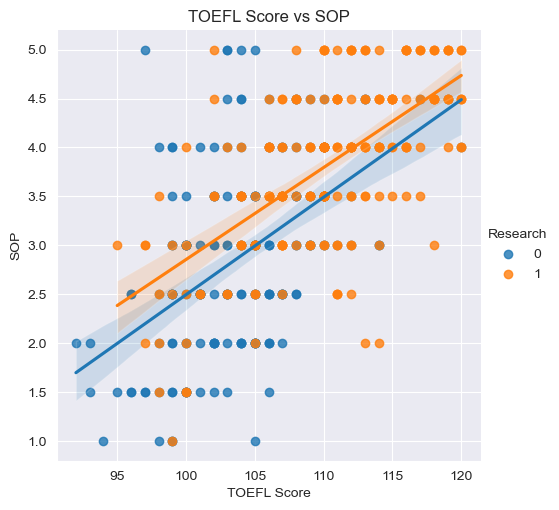

In [28]:
fig = sns.lmplot(x="TOEFL Score", y="SOP", data=admission_df, hue="Research")
plt.title("TOEFL Score vs SOP")
plt.show()

SOP and TOEFL score are not much related. Various SOP scores are distributed among various TOEFL scores.

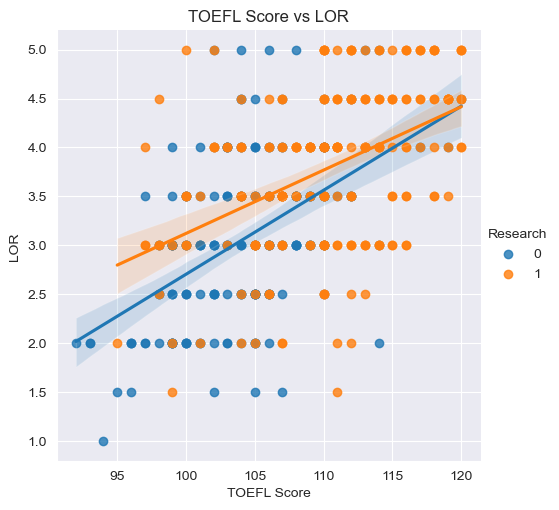

In [29]:
fig = sns.lmplot(x="TOEFL Score", y="LOR ", data=admission_df, hue="Research")
plt.title("TOEFL Score vs LOR")
plt.show()

The case of relationship between TOEFL and LOR are the same as the case of relationship among TOEFL and SOP

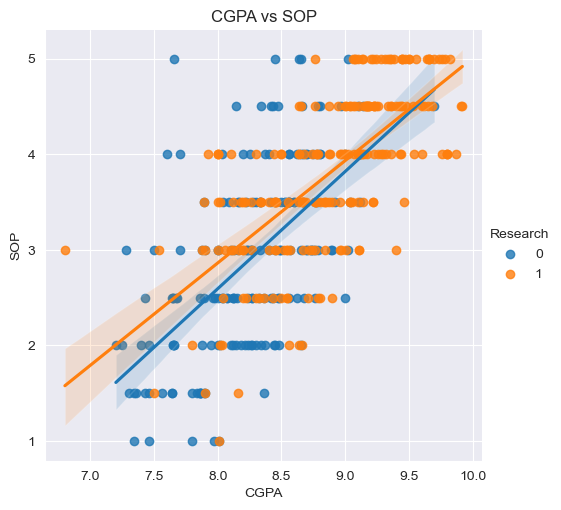

In [31]:
fig = sns.lmplot(x="CGPA", y="SOP", data=admission_df, hue="Research")
plt.title("CGPA vs SOP")
plt.show()

CGPA and SOP are not that much related. Since Statement of purpose(SOP) includes the accomplishments, the people with high CGPA tends to have good score of SOP.

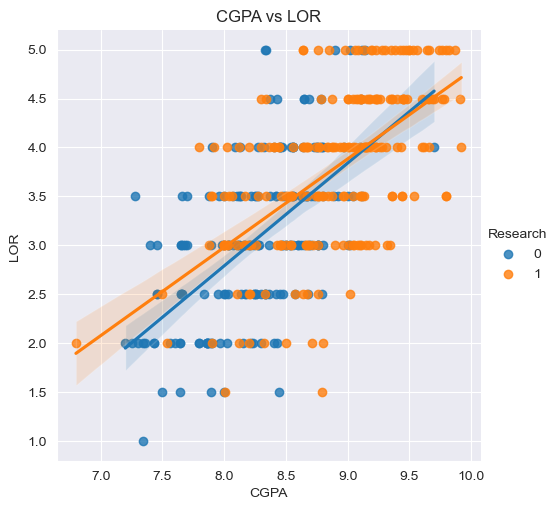

In [32]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=admission_df, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

CGPA and LOR are not much related. Various CGPA scores have different kinds of LOR scores.

## Correlation between features

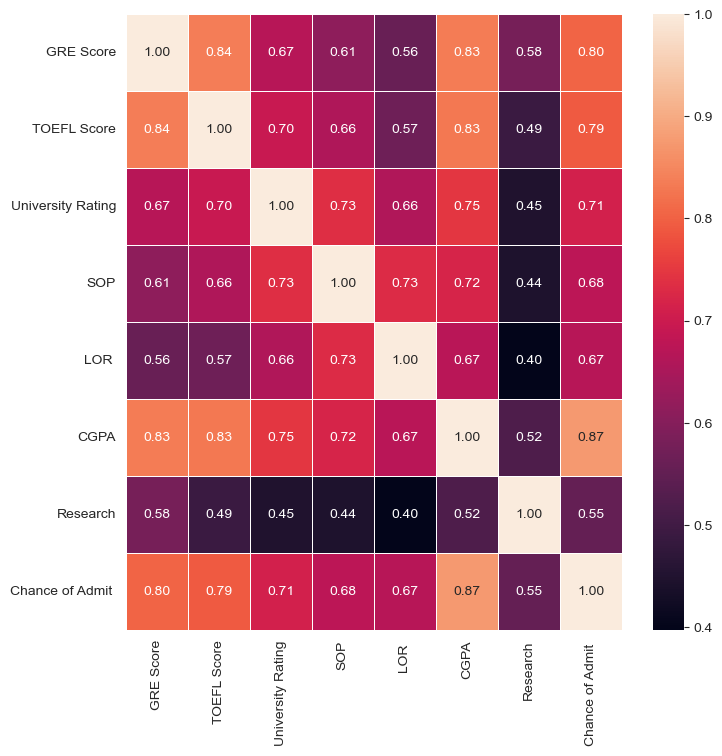

In [35]:
corr_data = admission_df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_data, linewidths=.5, annot=True, fmt=".2f")
plt.show()

With the correlation heatmap, the relationship between various features are easily identified.

From this, the key takeaway is the relation between different features and their effect on chance of admit.
The CGPA score has highest importance in the chance of admit with the correlation of 0.87, followed by GRE Score (correlation of 0.80) and then TOEFL(correlation of 0.79).

## Model Fitting and Prediction

Training and Test Splitting

In [45]:
from sklearn.model_selection import train_test_split

X = admission_df.drop(['Chance of Admit '], axis = 1)
y = admission_df['Chance of Admit ']

x_train, X_test, y_train, Y_test = train_test_split(X,y,test_size=0.3, random_state=42)  
print(x_train.shape, X_test.shape, y_train.shape, Y_test.shape)

(280, 7) (120, 7) (280,) (120,)


### Decision Tree Model

In [39]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
prediction = model.predict(X_test)
print('Decision Tree: ', np.sqrt(mean_squared_error(Y_test, prediction))  )

Decision Tree:  0.1008877263760728


The error rate in the predictions by decision tree model is quite high.

### Other kind of Models and predictions along with error score

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

models = {'Linear Regression': LinearRegression(), 'Random Forest': RandomForestRegressor(), 'KNN' : KNeighborsRegressor(),
          'SVM':SVR(), 'Gradient Boost': GradientBoostingRegressor()
          }

for model_name, model in models.items():
    #error rate
    prediction_model = model
    prediction_model.fit(x_train, y_train)
    predictions = prediction_model.predict(X_test)
    print(str(model_name) + ': ' + str(np.sqrt(mean_squared_error(Y_test, predictions))) )


Linear Regression: 0.06821159612911354
Random Forest: 0.07143990831461079
KNN: 0.08126910031904293
SVM: 0.09241499098537494
Gradient Boost: 0.07440436627093772


Insights:
With the shown outputs of error rates in different models, it is clearly seen that the Linear Regression model has lesser error rate comparatively and hence is considered as the best model in this case. A simple model like Linear Regression performs the best with these kind of data.

### Conclusion:
Thus, from the analysis, it is clear that the CGPA, GRE score, and TOEFL score are of high importance in getting a admit for graduate schools. These three features performs the best in predicting the chance of admit of the student.

Thank you : )